# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reading the spills data

In [2]:
spills = pd.read_csv('Spill_Incidents.csv')
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [3]:
spills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534454 entries, 0 to 534453
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Spill Number           534454 non-null  int64  
 1   Program Facility Name  534448 non-null  object 
 2   Street 1               534324 non-null  object 
 3   Street 2               41603 non-null   object 
 4   Locality               533336 non-null  object 
 5   County                 534454 non-null  object 
 6   ZIP Code               50002 non-null   object 
 7   SWIS Code              534454 non-null  int64  
 8   DEC Region             534454 non-null  int64  
 9   Spill Date             534302 non-null  object 
 10  Received Date          533977 non-null  object 
 11  Contributing Factor    534454 non-null  object 
 12  Waterbody              45847 non-null   object 
 13  Source                 534454 non-null  object 
 14  Close Date             523978 non-nu

# Data Cleaning

In [4]:
spills['Spill Number'] = spills['Spill Number'].astype(object)
spills['SWIS Code'] = spills['SWIS Code'].astype(object)
spills['DEC Region'] = spills['DEC Region'].astype(object)

In [5]:
spills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534454 entries, 0 to 534453
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Spill Number           534454 non-null  object 
 1   Program Facility Name  534448 non-null  object 
 2   Street 1               534324 non-null  object 
 3   Street 2               41603 non-null   object 
 4   Locality               533336 non-null  object 
 5   County                 534454 non-null  object 
 6   ZIP Code               50002 non-null   object 
 7   SWIS Code              534454 non-null  object 
 8   DEC Region             534454 non-null  object 
 9   Spill Date             534302 non-null  object 
 10  Received Date          533977 non-null  object 
 11  Contributing Factor    534454 non-null  object 
 12  Waterbody              45847 non-null   object 
 13  Source                 534454 non-null  object 
 14  Close Date             523978 non-nu

In [6]:
spills.describe()

,Quantity,Recovered
count,5.344540e+05,5.344540e+05
mean,1.892502e+05,4.553842e+02
std,1.367878e+08,2.151110e+05
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,5.000000e+00,0.000000e+00
max,1.000000e+11,1.111111e+08


In [7]:
#Finding the number of missing values in each column
spills.isna().sum()

Spill Number                  0
Program Facility Name         6
Street 1                    130
Street 2                 492851
Locality                   1118
County                        0
ZIP Code                 484452
SWIS Code                     0
DEC Region                    0
Spill Date                  152
Received Date               477
Contributing Factor           0
Waterbody                488607
Source                        0
Close Date                10476
Material Name                 0
Material Family               0
Quantity                      0
Units                    101268
Recovered                     0
dtype: int64

In [8]:
# Finding the percentage of missing values in each column
spills.isna().sum()*100/len(spills)

Spill Number              0.000000
Program Facility Name     0.001123
Street 1                  0.024324
Street 2                 92.215794
Locality                  0.209185
County                    0.000000
ZIP Code                 90.644284
SWIS Code                 0.000000
DEC Region                0.000000
Spill Date                0.028440
Received Date             0.089250
Contributing Factor       0.000000
Waterbody                91.421713
Source                    0.000000
Close Date                1.960131
Material Name             0.000000
Material Family           0.000000
Quantity                  0.000000
Units                    18.947936
Recovered                 0.000000
dtype: float64

In [9]:
#  Columns 'Street 2', 'ZIP Code' and 'Waterbody' contain more than 90% missing values. 
# So, remove these columns as these are not required for analysis

spills = spills.drop(['Street 2', 'ZIP Code', 'Waterbody'], axis=1)

In [10]:
spills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534454 entries, 0 to 534453
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Spill Number           534454 non-null  object 
 1   Program Facility Name  534448 non-null  object 
 2   Street 1               534324 non-null  object 
 3   Locality               533336 non-null  object 
 4   County                 534454 non-null  object 
 5   SWIS Code              534454 non-null  object 
 6   DEC Region             534454 non-null  object 
 7   Spill Date             534302 non-null  object 
 8   Received Date          533977 non-null  object 
 9   Contributing Factor    534454 non-null  object 
 10  Source                 534454 non-null  object 
 11  Close Date             523978 non-null  object 
 12  Material Name          534454 non-null  object 
 13  Material Family        534454 non-null  object 
 14  Quantity               534454 non-nu

In [11]:
# The column 'Spill Date' contains 0.028% of missing values. 
# Let us check if we can impute these missing values based on 'Received Date'

spills_date = spills[spills['Spill Date'] == spills['Received Date']]
len(spills_date)*100/len(spills)

82.20838463179244

Observation: 82.2% of the rows have same data for both the columns. So, we can impute the missing values of spill date with received date

In [12]:
# Imputing the missing values of 'Spill date' with the values from 'Received Date'

spills['Spill Date'] = spills['Spill Date'].fillna(value = spills['Received Date'])
spills.isna().sum()

Spill Number                  0
Program Facility Name         6
Street 1                    130
Locality                   1118
County                        0
SWIS Code                     0
DEC Region                    0
Spill Date                    0
Received Date               477
Contributing Factor           0
Source                        0
Close Date                10476
Material Name                 0
Material Family               0
Quantity                      0
Units                    101268
Recovered                     0
dtype: int64

In [13]:
# As the values in both columns 'Spill Date' and 'Received date', we can drop the column 'Received Date'

spills = spills.drop(['Received Date'], axis=1)
spills.head()

,Spill Number,Program Facility Name,Street 1,Locality,County,SWIS Code,DEC Region,Spill Date,Contributing Factor,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,ELMSFORD,Westchester,6000,3,10/10/2001,Unknown,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,QUEENS,Queens,4101,2,08/21/2004,Other,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,QUEENS,Queens,4101,2,08/21/2004,Other,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,BRONX,Bronx,301,2,08/02/2002,Equipment Failure,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,LIBERTY,Sullivan,5336,3,01/20/2003,Traffic Accident,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [14]:
# As the columns 'Close Date' and 'Units' are not required for our analysis, we can drop these columns

spills = spills.drop(['Close Date', 'Units'], axis=1)
spills.head()

,Spill Number,Program Facility Name,Street 1,Locality,County,SWIS Code,DEC Region,Spill Date,Contributing Factor,Source,Material Name,Material Family,Quantity,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,ELMSFORD,Westchester,6000,3,10/10/2001,Unknown,Unknown,unknown material,Other,10.0,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,QUEENS,Queens,4101,2,08/21/2004,Other,Unknown,raw sewage,Other,0.0,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,QUEENS,Queens,4101,2,08/21/2004,Other,Unknown,raw sewage,Other,0.0,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,BRONX,Bronx,301,2,08/02/2002,Equipment Failure,Commercial/Industrial,transformer oil,Petroleum,1.0,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,LIBERTY,Sullivan,5336,3,01/20/2003,Traffic Accident,Commercial/Industrial,transformer oil,Petroleum,6.0,6.0


In [15]:
# Checking the missing values of the column 'Street 1'
spills[spills['Street 1'].isna()]

,Spill Number,Program Facility Name,Street 1,Locality,County,SWIS Code,DEC Region,Spill Date,Contributing Factor,Source,Material Name,Material Family,Quantity,Recovered
7277,8607901,2,NaN,NaN,Monroe,2800,8,11/11/1911,Unknown,Unknown,unknown material,Other,0.0,0.0
24992,8605878,98 ST.& L.I.E. QUEENS/RAW,NaN,NaN,Queens,4101,2,12/16/1986,Other,Commercial/Industrial,raw sewage,Other,0.0,0.0
44426,8702912,ARDSLEY,NaN,ARDSLEY,Westchester,6000,3,07/10/1987,Tank Test Failure,"Institutional, Educational, Gov., Other",#4 fuel oil,Petroleum,0.0,0.0
45566,1508309,ARTHUR KILL,NaN,STATEN ISLAND,Richmond,4301,2,11/10/2015,Unknown,Unknown,unknown petroleum,Petroleum,0.0,0.0
48549,8705387,ATLANTIC REFINING,NaN,WEST SENECA,Erie,1568,9,09/27/1987,Equipment Failure,Passenger Vehicle,gasoline,Petroleum,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514079,8606915,VOID -DUPLICATE OF 866894,NaN,NaN,Cayuga,600,7,02/10/1987,Unknown,Unknown,unknown material,Other,0.0,0.0
516254,8707772,WALNUT MT. NURSING HOME,NaN,LIBERTY,Sullivan,5300,3,12/09/1987,Tank Test Failure,"Institutional, Educational, Gov., Other",#2 fuel oil,Petroleum,0.0,0.0
523765,8708174,WESTCHESTER C. C.,NaN,HARRISON,Westchester,6000,3,12/21/1987,Tank Overfill,Commercial/Industrial,#4 fuel oil,Petroleum,600.0,0.0
525197,9008235,WHALL BROCKWAY SUPPLY,NaN,NaN,Steuben,5100,8,10/19/1990,Unknown,Unknown,unknown material,Other,0.0,0.0


In [16]:
# As the number of missing values in the column 'Street 1' are just about 0.02%, we can drop these rows
# Also, we can drop 6 missing rows of the column 'Program Facility Name'
# Also, we can drop 0.2% of the missing values in the coulmn 'Locality'

spills = spills.dropna(subset=['Street 1','Program Facility Name','Locality'])
spills.isna().sum()

Spill Number             0
Program Facility Name    0
Street 1                 0
Locality                 0
County                   0
SWIS Code                0
DEC Region               0
Spill Date               0
Contributing Factor      0
Source                   0
Material Name            0
Material Family          0
Quantity                 0
Recovered                0
dtype: int64

In [17]:
spills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533223 entries, 0 to 534453
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Spill Number           533223 non-null  object 
 1   Program Facility Name  533223 non-null  object 
 2   Street 1               533223 non-null  object 
 3   Locality               533223 non-null  object 
 4   County                 533223 non-null  object 
 5   SWIS Code              533223 non-null  object 
 6   DEC Region             533223 non-null  object 
 7   Spill Date             533223 non-null  object 
 8   Contributing Factor    533223 non-null  object 
 9   Source                 533223 non-null  object 
 10  Material Name          533223 non-null  object 
 11  Material Family        533223 non-null  object 
 12  Quantity               533223 non-null  float64
 13  Recovered              533223 non-null  float64
dtypes: float64(2), object(12)
memory usa

### Observations:
- Now the data is clean with correct data types and without any missing values.
- This dataset has 533223 rows and 14 columns
- All the columns are categorical except 'Quantity' and 'Recovered', which are numerical

# Reading Income data of NY state

In [18]:
income = pd.read_csv('ACSST1Y2021.S1901-2023-03-05T045914.csv')
income

,Label (Grouping),"Albany County, New York!!Households!!Estimate","Albany County, New York!!Families!!Estimate","Albany County, New York!!Married-couple families!!Estimate","Albany County, New York!!Nonfamily households!!Estimate","Bronx County, New York!!Households!!Estimate","Bronx County, New York!!Families!!Estimate","Bronx County, New York!!Married-couple families!!Estimate","Bronx County, New York!!Nonfamily households!!Estimate","Broome County, New York!!Households!!Estimate",...,"Warren County, New York!!Married-couple families!!Estimate","Warren County, New York!!Nonfamily households!!Estimate","Wayne County, New York!!Households!!Estimate","Wayne County, New York!!Families!!Estimate","Wayne County, New York!!Married-couple families!!Estimate","Wayne County, New York!!Nonfamily households!!Estimate","Westchester County, New York!!Households!!Estimate","Westchester County, New York!!Families!!Estimate","Westchester County, New York!!Married-couple families!!Estimate","Westchester County, New York!!Nonfamily households!!Estimate"
0,Total,"132,171","72,209","53,562","59,962","533,004","341,285","141,993","191,719","84,452",...,N,"11,413","38,634","25,245",N,"13,389","371,736","254,245","193,476","117,491"
1,"Less than $10,000",5.4%,3.0%,0.8%,9.2%,13.3%,9.7%,4.4%,22.2%,6.7%,...,N,7.5%,5.3%,2.7%,N,11.7%,5.7%,3.0%,1.4%,12.3%
2,"$10,000 to $14,999",4.2%,1.2%,0.2%,7.8%,8.4%,6.2%,2.9%,13.9%,4.9%,...,N,4.4%,3.6%,0.8%,N,9.0%,2.7%,1.8%,1.0%,5.0%
3,"$15,000 to $24,999",6.1%,3.0%,1.5%,10.7%,10.8%,9.1%,5.6%,14.6%,10.3%,...,N,17.3%,6.2%,4.3%,N,9.9%,5.0%,2.8%,1.7%,10.0%
4,"$25,000 to $34,999",6.1%,5.5%,2.3%,8.2%,10.0%,9.9%,6.7%,10.9%,8.5%,...,N,12.6%,9.5%,5.7%,N,18.3%,4.9%,3.6%,2.6%,8.1%
5,"$35,000 to $49,999",11.5%,8.6%,6.4%,15.2%,13.6%,14.7%,13.2%,10.3%,15.0%,...,N,13.5%,11.9%,10.6%,N,17.9%,6.2%,4.8%,3.4%,10.1%
6,"$50,000 to $74,999",16.5%,12.3%,9.8%,20.7%,15.4%,17.5%,18.4%,12.0%,16.2%,...,N,19.1%,20.9%,20.9%,N,16.9%,12.0%,10.0%,8.3%,17.1%
7,"$75,000 to $99,999",15.8%,16.9%,18.0%,14.5%,10.2%,10.6%,13.8%,8.0%,12.8%,...,N,12.4%,14.7%,18.3%,N,6.3%,10.3%,8.9%,7.8%,11.8%
8,"$100,000 to $149,999",16.5%,21.3%,25.1%,9.4%,10.3%,12.8%,18.5%,5.1%,14.5%,...,N,6.1%,18.4%,25.1%,N,7.2%,15.6%,17.0%,17.0%,12.1%
9,"$150,000 to $199,999",8.2%,12.9%,16.2%,1.4%,4.1%,4.9%,8.6%,1.5%,4.8%,...,N,3.7%,5.7%,7.5%,N,1.0%,11.1%,13.4%,14.7%,5.9%


In [19]:
# Checking missing values

income.isna().sum()

Label (Grouping)                                                   0
Albany County, New York!!Households!!Estimate                      1
Albany County, New York!!Families!!Estimate                        1
Albany County, New York!!Married-couple families!!Estimate         1
Albany County, New York!!Nonfamily households!!Estimate            1
                                                                  ..
Wayne County, New York!!Nonfamily households!!Estimate             1
Westchester County, New York!!Households!!Estimate                 1
Westchester County, New York!!Families!!Estimate                   1
Westchester County, New York!!Married-couple families!!Estimate    1
Westchester County, New York!!Nonfamily households!!Estimate       1
Length: 153, dtype: int64

In [20]:
# As the missing value is related to the single row 'PERCENT ALLOCATED', we can delete this row

income = income.dropna()
income.isna().sum()

Label (Grouping)                                                   0
Albany County, New York!!Households!!Estimate                      0
Albany County, New York!!Families!!Estimate                        0
Albany County, New York!!Married-couple families!!Estimate         0
Albany County, New York!!Nonfamily households!!Estimate            0
                                                                  ..
Wayne County, New York!!Nonfamily households!!Estimate             0
Westchester County, New York!!Households!!Estimate                 0
Westchester County, New York!!Families!!Estimate                   0
Westchester County, New York!!Married-couple families!!Estimate    0
Westchester County, New York!!Nonfamily households!!Estimate       0
Length: 153, dtype: int64

# Reading the data of manufacturing firms

In [21]:
firms = pd.read_csv('ECNLOCMFG2017.EC1731LOCMFG-2023-03-05T045313.csv')
firms

,Geographic Area Name (NAME),2017 NAICS code (NAICS2017),Meaning of NAICS code (NAICS2017_LABEL),Meaning of Employment size of establishments code (EMPSZFE_LABEL),Year (YEAR),Number of establishments (ESTAB)
0,"Albany County, New York",31-33,Manufacturing,All establishments,2017,234
1,"Albany County, New York",31-33,Manufacturing,Establishments operated for the entire year,2017,234
2,"Albany County, New York",31-33,Manufacturing,Establishments operated entire year with less ...,2017,110
3,"Albany County, New York",31-33,Manufacturing,Establishments operated entire year with 5 to ...,2017,27
4,"Albany County, New York",31-33,Manufacturing,Establishments operated entire year with 10 to...,2017,24
...,...,...,...,...,...,...
495,"Yates County, New York",31-33,Manufacturing,Establishments operated entire year with less ...,2017,23
496,"Yates County, New York",31-33,Manufacturing,Establishments operated entire year with 5 to ...,2017,5
497,"Yates County, New York",31-33,Manufacturing,Establishments operated entire year with 10 to...,2017,5
498,"Yates County, New York",31-33,Manufacturing,Establishments operated entire year with 20 to...,2017,5


In [22]:
# Checking the missing values

firms.isna().sum()

Geographic Area Name (NAME)                                          0
2017 NAICS code (NAICS2017)                                          0
Meaning of NAICS code (NAICS2017_LABEL)                              0
Meaning of Employment size of establishments code (EMPSZFE_LABEL)    0
Year (YEAR)                                                          0
Number of establishments (ESTAB)                                     0
dtype: int64

# Data Visulaization of Spills data

## Analysis of categorical columns

### Analysing the column 'Program Facility Name'

In [24]:
spills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533223 entries, 0 to 534453
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Spill Number           533223 non-null  object 
 1   Program Facility Name  533223 non-null  object 
 2   Street 1               533223 non-null  object 
 3   Locality               533223 non-null  object 
 4   County                 533223 non-null  object 
 5   SWIS Code              533223 non-null  object 
 6   DEC Region             533223 non-null  object 
 7   Spill Date             533223 non-null  object 
 8   Contributing Factor    533223 non-null  object 
 9   Source                 533223 non-null  object 
 10  Material Name          533223 non-null  object 
 11  Material Family        533223 non-null  object 
 12  Quantity               533223 non-null  float64
 13  Recovered              533223 non-null  float64
dtypes: float64(2), object(12)
memory usa

In [32]:
spills['Program Facility Name'].value_counts()

UNKNOWN                13746
RESIDENCE              11896
ROADWAY                 5649
COMMERCIAL              2462
RESIDENTIAL             2205
                       ...  
GIAMVORNE RESIDENCE        1
GIAN TRUCKING              1
GIANAAC RESIDENCE          1
GIANACA RESIDENCE          1
`-RAVENSWOOD               1
Name: Program Facility Name, Length: 296241, dtype: int64

Observation: This column has 296241 categories which is too huge to make any inferences

### Analysing the column 'Street 1'

In [35]:
spills['Locality'].value_counts()

BROOKLYN                        21500
MANHATTAN                       15243
BRONX                           13142
QUEENS                          11023
ROCHESTER                        8931
                                ...  
BALDWINSVIILE                       1
NEW BALTIMORE WEST COXSACKIE        1
CASTLE HEIGHTS                      1
HASTING CENTRAL SQUARE              1
PROSPECT HEIGHTS                    1
Name: Locality, Length: 9823, dtype: int64

In [37]:
spills['Locality'].value_counts(normalize=True)

BROOKLYN                        0.040321
MANHATTAN                       0.028587
BRONX                           0.024646
QUEENS                          0.020672
ROCHESTER                       0.016749
                                  ...   
BALDWINSVIILE                   0.000002
NEW BALTIMORE WEST COXSACKIE    0.000002
CASTLE HEIGHTS                  0.000002
HASTING CENTRAL SQUARE          0.000002
PROSPECT HEIGHTS                0.000002
Name: Locality, Length: 9823, dtype: float64

<AxesSubplot:>

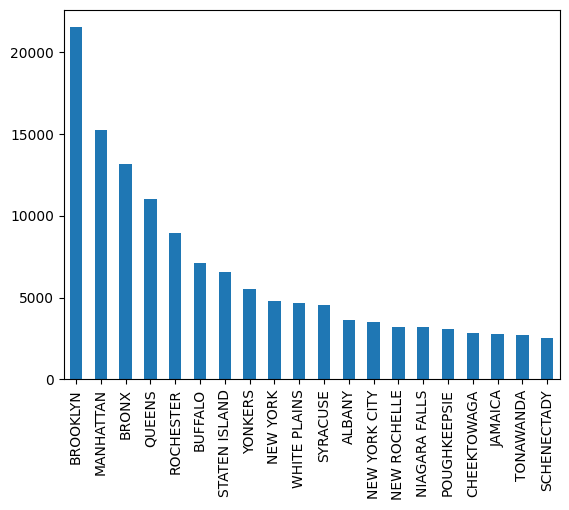

In [38]:
spills['Locality'].value_counts().nlargest(20).plot.bar()
plt.show()

### Analysing the column 'County'

In [39]:
spills['County'].value_counts()

Westchester                       53582
Suffolk                           49144
Nassau                            43420
Queens                            28862
Erie                              24515
                                  ...  
Canada - Region 5                     1
Oil Springs Indian Reservation        1
Connecticut - Region 3 (T)            1
Connecticut - Region 4                1
Shinnecock Indian Reservation         1
Name: County, Length: 87, dtype: int64

In [42]:
spills['County'].value_counts(normalize=True)

Westchester                       0.100487
Suffolk                           0.092164
Nassau                            0.081429
Queens                            0.054127
Erie                              0.045975
                                    ...   
Canada - Region 5                 0.000002
Oil Springs Indian Reservation    0.000002
Connecticut - Region 3 (T)        0.000002
Connecticut - Region 4            0.000002
Shinnecock Indian Reservation     0.000002
Name: County, Length: 87, dtype: float64

<AxesSubplot:>

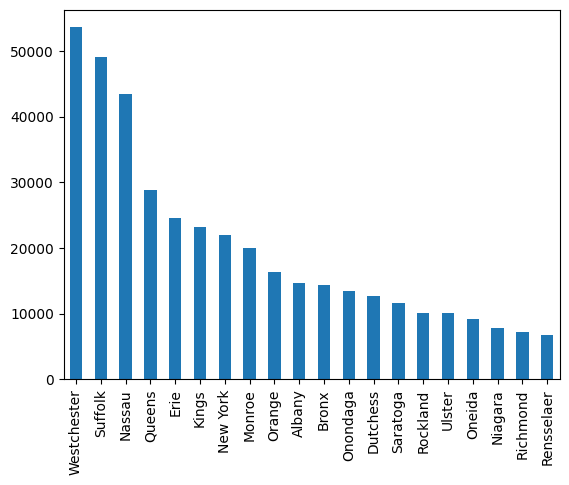

In [41]:
spills['County'].value_counts().nlargest(20).plot.bar()
plt.show()

### Analysing the column 'DEC Region'

In [44]:
spills['DEC Region'].value_counts()

3    113605
2     96026
1     92575
4     44912
8     44451
9     42575
7     38278
5     34533
6     26268
Name: DEC Region, dtype: int64

<AxesSubplot:xlabel='DEC Region', ylabel='count'>

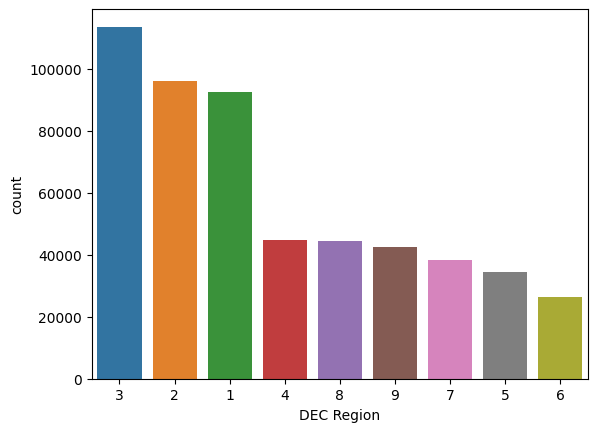

In [48]:
sns.countplot(data=spills, x='DEC Region', order=spills['DEC Region'].value_counts().index)
plt.show()

### Analyzing the column 'Contributing Factor'

In [49]:
spills['Contributing Factor'].value_counts()

Equipment Failure                           197414
Unknown                                      95116
Other                                        54847
Human Error                                  34922
Traffic Accident                             31583
Tank Test Failure                            28492
Deliberate                                   22355
Tank Failure                                 21807
Housekeeping                                 16527
Tank Overfill                                10911
Abandoned Drums                               8766
Storm                                         8517
Vandalism                                     1812
Missing Code in Old Data - Must be fixed       154
Name: Contributing Factor, dtype: int64

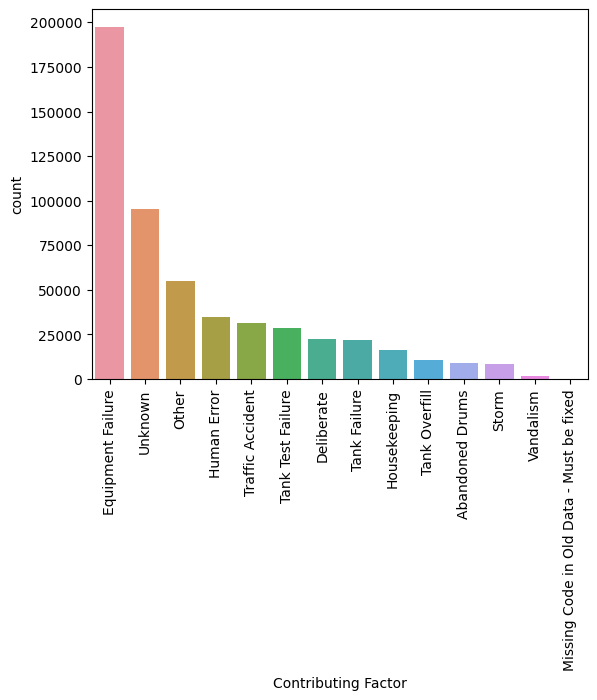

In [51]:
sns.countplot(data=spills, x='Contributing Factor', order=spills['Contributing Factor'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Observation:

### Analyzing the column 'Source'

In [52]:
spills['Source'].value_counts()

Commercial/Industrial                       152297
Private Dwelling                            114197
Commercial Vehicle                           61487
Unknown                                      58394
Institutional, Educational, Gov., Other      44621
Gasoline Station or other PBS Facility       42428
Passenger Vehicle                            15115
Transformer                                  13907
Tank Truck                                   12511
Major Facility (MOSF) > 400,000 gal           5629
Vessel                                        5321
Non Major Facility > 1,100 gal                3818
Railroad Car                                  2510
Airport/Aircraft                               680
Missing Code in Old Data - Must be fixed       223
Chemical Bulk Storage Facility                  85
Name: Source, dtype: int64

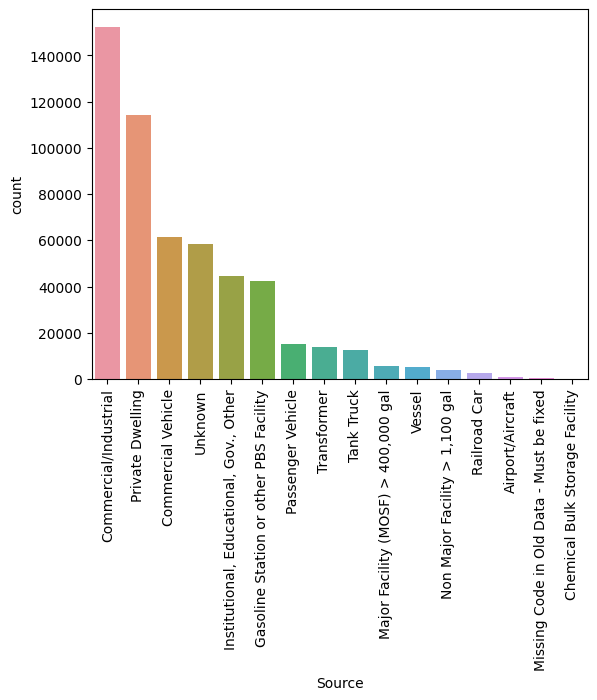

In [53]:
sns.countplot(data=spills, x='Source', order=spills['Source'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Observation:

### Analyzing the column 'Material Name'

In [54]:
spills['Material Name'].value_counts()

#2 fuel oil                   135742
gasoline                       63473
unknown petroleum              49845
diesel                         47567
transformer oil                31676
                               ...  
methyl tri methoxy                 1
dichloromethylphenylsilane         1
vinyl siloxane                     1
silicone solvent mix               1
opti-troll 999                     1
Name: Material Name, Length: 5538, dtype: int64

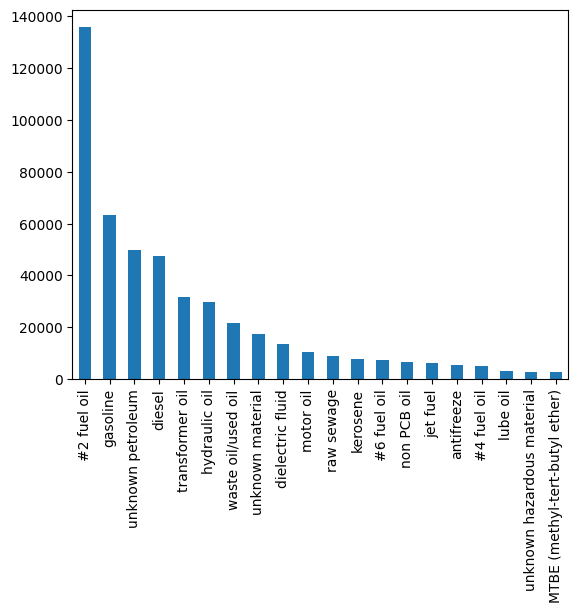

In [57]:
spills['Material Name'].value_counts().nlargest(20).plot.bar()
plt.show()

Observation:

### Analyzing the column 'Material Family'

In [55]:
spills['Material Family'].value_counts()

Petroleum             452324
Other                  63675
Hazardous Material     16827
Oxygenates               397
Name: Material Family, dtype: int64

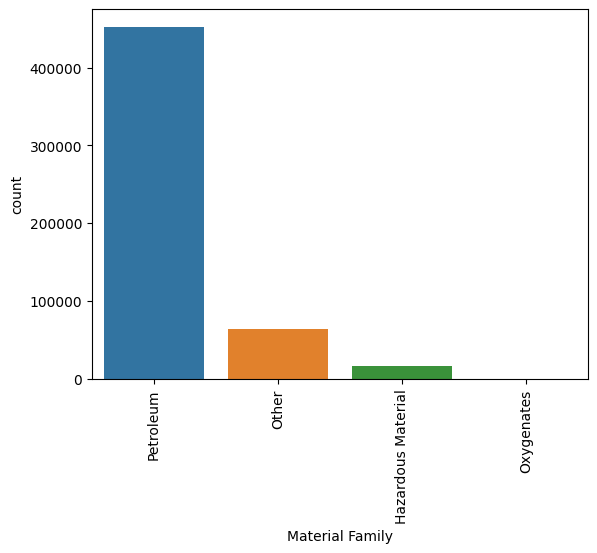

In [58]:
sns.countplot(data=spills, x='Material Family', order=spills['Material Family'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Observation: